# 인기 영화 분류하기 실습

* 데이터 출처 : Kaggle

* 사람들이 선호하는 영화가 무엇인지 분류
* 새로운 영화가 어느정도 인기 있을 지 분석

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [18]:
df = pd.read_csv("./data/chap11_movie_genre_final.csv")
df.head(3)

,id,original_title,target,vote_average,Action,Adventure,Fantasy,ScienceFiction,Crime,Drama,...,Mystery,History,War,Music,Documentary,Foreign,TVMovie,director,cast,keywords
0,19995,Avatar,7,7.2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,James Cameron,"SamWorthington,SigourneyWeaver,StephenLang,Zoe...","['culture clash', 'future', 'space war', 'spac..."
1,285,Pirates of the Caribbean: At World's End,7,6.9,1,1,1,0,0,0,...,0,0,0,0,0,0,0,Gore Verbinski,"JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...","['ocean', 'drug abuse', 'exotic island', 'east..."
2,206647,Spectre,6,6.3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,Sam Mendes,"ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...","['spy', 'based on novel', 'secret agent', 'seq..."


In [20]:
df.shape

(4775, 27)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4775 entries, 0 to 4774
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4775 non-null   int64  
 1   original_title  4775 non-null   object 
 2   target          4775 non-null   int64  
 3   vote_average    4775 non-null   float64
 4   Action          4775 non-null   int64  
 5   Adventure       4775 non-null   int64  
 6   Fantasy         4775 non-null   int64  
 7   ScienceFiction  4775 non-null   int64  
 8   Crime           4775 non-null   int64  
 9   Drama           4775 non-null   int64  
 10  Thriller        4775 non-null   int64  
 11  Animation       4775 non-null   int64  
 12  Family          4775 non-null   int64  
 13  Western         4775 non-null   int64  
 14  Comedy          4775 non-null   int64  
 15  Romance         4775 non-null   int64  
 16  Horror          4775 non-null   int64  
 17  Mystery         4775 non-null   i

## 영화 레이블 분포

* 6과 7로 분류된 영화가 많다는 것을 알 수 있다.

C:\Users\hjoon\AppData\Local\Temp\ipykernel_12604\1166756070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target'], bins=20)


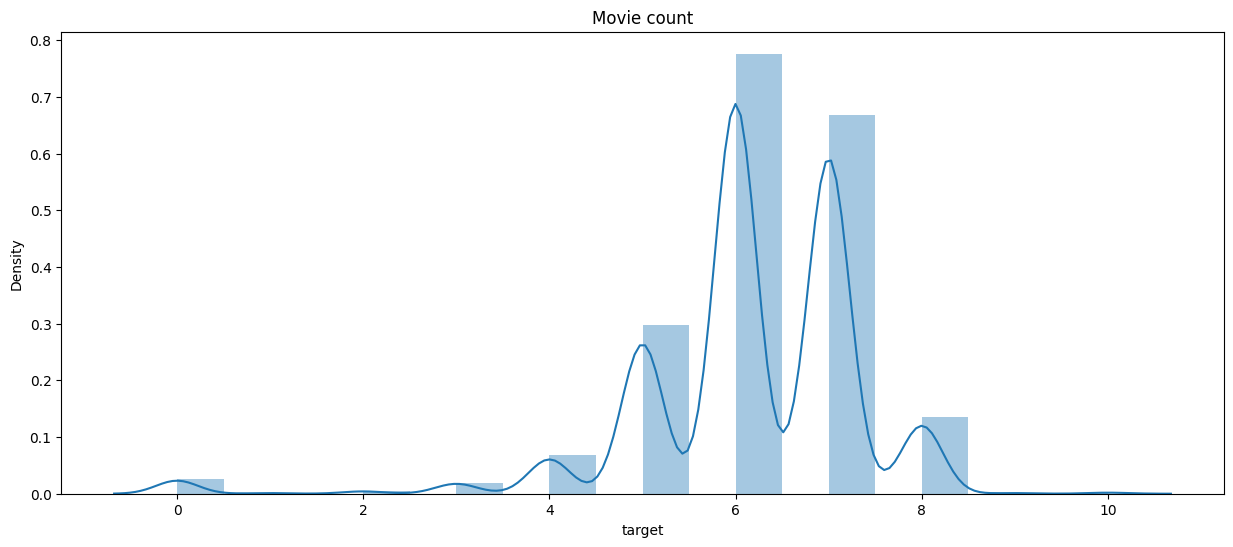

In [94]:
plt.figure(1, figsize=(15, 6))
sns.distplot(df['target'], bins=20)
plt.title("Movie count")
plt.show()

## 영화 평점 분포

* 평점이 5점 후반 ~ 7점 중반대에 분포되어있다.

C:\Users\hjoon\AppData\Local\Temp\ipykernel_5220\2072899569.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['vote_average'], bins=20)


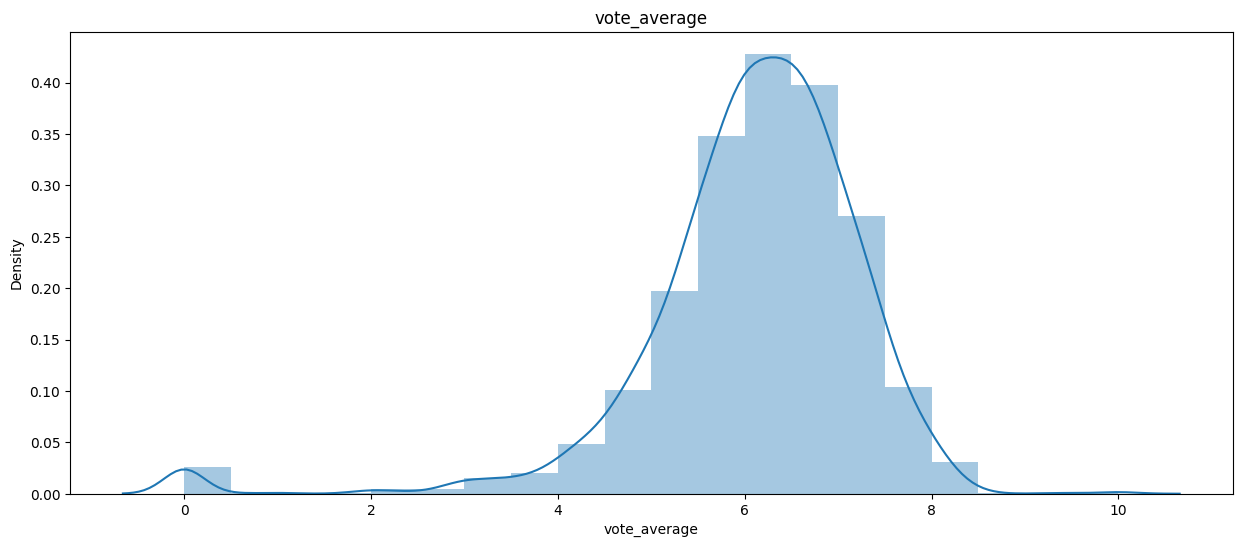

In [25]:
plt.figure(1, figsize=(15, 6))
sns.distplot(df['vote_average'], bins=20)
plt.title("vote_average")
plt.show()

In [100]:
print(df.columns)

Index(['id', 'original_title', 'target', 'vote_average', 'Action', 'Adventure',
       'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation',
       'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery',
       'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie',
       'director', 'cast', 'keywords'],
      dtype='object')


## 영화의 개수 분포

* 영화 장르와 장르별 개수를 시각화 진행

In [31]:
genre_list = [ 'Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation',
              'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery',
              'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie']
count_list = []

for i in genre_list:
    count_list.append(len(df[df[i] == 1]))

count_list[:3]

[1140, 786, 421]

Action : 1140
Adventure : 786
Fantasy : 421
ScienceFiction : 535
Crime : 691
Drama : 2281
Thriller : 1270
Animation : 232
Family : 512
Western : 81
Comedy : 1714
Romance : 891
Horror : 518
Mystery : 347
History : 191
War : 143
Music : 184
Documentary : 110
Foreign : 33
TVMovie : 8


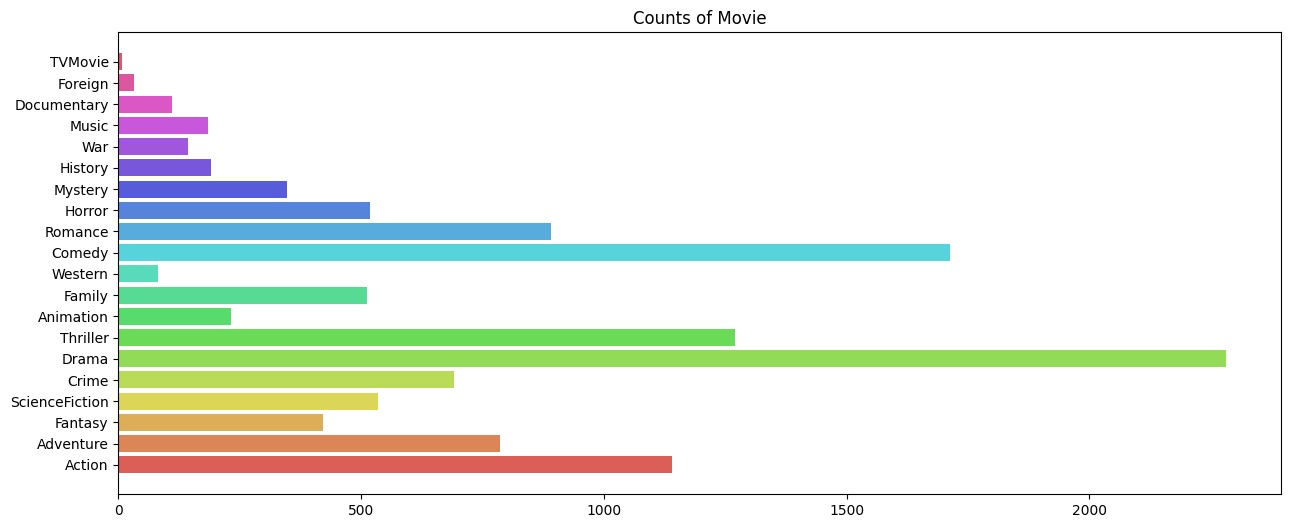

In [114]:
plt.figure(1, figsize=(15, 6))
plt.barh(genre_list, count_list, color = sns.color_palette("hls", 20))
for i in range(len(genre_list)):
    print(f"{genre_list[i]} : {count_list[i]}")
plt.title("Counts of Movie")
plt.show()

## 장르별 평점 6.5 이상의 영화 갯수

In [36]:
temp = (df["Drama"] == 1) & (df["vote_average"] >= 6.5)
print(f"Drama Movie total : {len(df[df["Drama"] == 1])}, vote_average >= 6.5 : {len(df[temp])}")
print(f"Ratio over vote_average 6.5 : {round(len(df[temp])  / len(df[df["Drama"] == 1]) * 100, 2)}%")

temp = (df["Comedy"] == 1) & (df["vote_average"] >= 6.5)
print(f"Comedy Movie total : {len(df[df["Comedy"] == 1])}, vote_average >= 6.5 : {len(df[temp])}")
print(f"Ratio over vote_average 6.5 : {round(len(df[temp])  / len(df[df["Comedy"] == 1]) * 100, 2)}%")

temp = (df["Thriller"] == 1) & (df["vote_average"] >= 6.5)
print(f"Thriller Movie total : {len(df[df["Thriller"] == 1])}, vote_average >= 6.5 : {len(df[temp])}")
print(f"Ratio over vote_average 6.5 : {round(len(df[temp])  / len(df[df["Thriller"] == 1]) * 100, 2)}%")

temp = (df["Action"] == 1) & (df["vote_average"] >= 6.5)
print(f"Action Movie total : {len(df[df["Action"] == 1])}, vote_average >= 6.5 : {len(df[temp])}")
print(f"Ratio over vote_average 6.5 : {round(len(df[temp])  / len(df[df["Action"] == 1]) * 100, 2)}%")

Drama Movie total : 2281, vote_average >= 6.5 : 1208
Ratio over vote_average 6.5 : 52.96%
Comedy Movie total : 1714, vote_average >= 6.5 : 521
Ratio over vote_average 6.5 : 30.4%
Thriller Movie total : 1270, vote_average >= 6.5 : 415
Ratio over vote_average 6.5 : 32.68%
Action Movie total : 1140, vote_average >= 6.5 : 355
Ratio over vote_average 6.5 : 31.14%


In [38]:
from sklearn.model_selection import train_test_split
x = df[[ 'Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation',
              'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery',
              'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie']]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3820, 20), (955, 20), (3820,), (955,))

In [40]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")

for i in range(scores.size):
    print(f"{i+1}번째 정확도 : {scores[i]}")

C:\Users\hjoon\anaconda3\envs\kloudenv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


1번째 정확도 : 0.3769633507853403
2번째 정확도 : 0.3599476439790576
3번째 정확도 : 0.4031413612565445
4번째 정확도 : 0.3769633507853403
5번째 정확도 : 0.36518324607329844


In [44]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
print(neigh.classes_)
print(f"거리계산방법 : {neigh.effective_metric_}")
print(f"샘플 수 : {neigh.n_samples_fit_}")

[ 0  1  2  3  4  5  6  7  8  9 10]
거리계산방법 : euclidean
샘플 수 : 3820


In [46]:
print(neigh.score(X_test,y_test))
new_x = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
prediction = neigh.predict([new_x])
prediction

0.36963350785340315


C:\Users\hjoon\anaconda3\envs\kloudenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

* 0.369의 정확도를 보이고, 인기 정도가 0인 것으로 분류하였다.
* 독립변수가 많아 정확한 예측을 하기가 어려우며, 조금 줄일 필요가 있어보인다.